# Prerequisites

## Step 1
Install the BioPython package.

In [1]:
!pip install biopython

     |████████████████████████████████| 2.3MB 4.4MB/s 


---
## Step 2
Download the mRNA design of the Pfizer and Moderna vaccines from:
https://github.com/NAalytics/Assemblies-of-putative-SARS-CoV2-spike-encoding-mRNA-sequences-for-vaccines-BNT-162b2-and-mRNA-1273

In [2]:
!git clone https://github.com/NAalytics/Assemblies-of-putative-SARS-CoV2-spike-encoding-mRNA-sequences-for-vaccines-BNT-162b2-and-mRNA-1273

Cloning into 'Assemblies-of-putative-SARS-CoV2-spike-encoding-mRNA-sequences-for-vaccines-BNT-162b2-and-mRNA-1273'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 64 (delta 31), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (64/64), done.


In [3]:
!ls Assemblies-of-putative-SARS-CoV2-spike-encoding-mRNA-sequences-for-vaccines-BNT-162b2-and-mRNA-1273

'Assemblies of putative SARS-CoV2-spike-encoding mRNA sequences for vaccines BNT-162b2 and mRNA-1273.docx.pdf'
 Figure1Figure2_032321.fasta
 README.md


In [4]:
mRNA_pfizer_moderna_vaccine_designs_filepath = \
    'Assemblies-of-putative-SARS-CoV2-spike-encoding-mRNA-sequences-for-vaccines-BNT-162b2-and-mRNA-1273/Figure1Figure2_032321.fasta'

In [5]:
from Bio import Entrez, SeqIO

In [6]:
for record in SeqIO.parse(mRNA_pfizer_moderna_vaccine_designs_filepath, "fasta"):
    print(record)
    print('---------')

ID: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
Name: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
Description: Figure1_032321_Spike-encoding_contig_assembled_from_BioNTech/Pfizer_BNT-162b2_vaccine
Number of features: 0
Seq('GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAACCCGCCACC...GCA')
---------
ID: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
Name: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
Description: Figure_2_32321_Spike-encoding_contig_assembled_from_Moderna_mRNA-1273_vaccine
Number of features: 0
Seq('GGGAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAAGACCCCGGCGCCGCC...AAA')
---------


In [7]:
import re
from Bio import Seq

In [8]:
vaccines_mRNA_seq = {}

for record in SeqIO.parse(mRNA_pfizer_moderna_vaccine_designs_filepath, "fasta"):
    # The sequences are actually DNA, so we need to first transcribe them before to get the RNA seq.
    vaccines_mRNA_seq[re.search('Moderna|BioNTech[^_]*', record.id)[0]] = record.seq.transcribe()

vaccines_mRNA_seq

{'BioNTech/Pfizer': Seq('GAGAAUAAACUAGUAUUCUUCUGGUCCCCACAGACUCAGAGAGAACCCGCCACC...GCA'),
 'Moderna': Seq('GGGAAAUAAGAGAGAAAAGAAGAGUAAGAAGAAAUAUAAGACCCCGGCGCCGCC...AAA')}

---
## Step 3
Download the sequence of “Wuhan” SARS-CoV-2 sequence from NCBI Genbank accession number NC_045512.2

In [9]:
def get_genome(id):
    # this function downloads a genome from the NBCI database (seen in lecture 2)
    handle = Entrez.efetch(db='nucleotide', id=id, rettype='gb', retmode='text', email='no@one.com')
    genome = SeqIO.read(handle, 'genbank')
    
    return genome

In [10]:
wuhan_sars_cov_2_sequence = get_genome('NC_045512.2')

In [11]:
print(wuhan_sars_cov_2_sequence.name)
print(wuhan_sars_cov_2_sequence.description)
# print(wuhan_sars_cov_2_sequence.seq)

NC_045512
Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome


---
## Step 4

The NCBI Virus database (https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/) has over 85,000 complete sequences of SARS-CoV-2. Download all complete sequences of SARS-CoV-2 in a FASTA format
(You don’t need these sequences until question #15)

Used the following page to search and find (complete) variants, and (manually) download them in FASTA format, to be uploaded to gDrive:

https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Severe%20acute%20respiratory%20syndrome%20coronavirus%202,%20taxid:2697049&Completeness_s=complete&HostLineage_ss=Homo%20sapiens%20(human),%20taxid:9606

---
# Questions

##Basics:

## 1

In [12]:
# TODO: DELETE before submission

m = re.search(f'AUG(.{{3}})*?(?:UGA|UAA|UAG)', 'GGGUAAUGAAAAAAUAGGGGUGA')
m.span()[0], m.span()[1], m[0]
# 'GGGUAAUGAAAAAAUAGGGG'.find(r/AUG/)

(5, 17, 'AUGAAAAAAUAG')

In [13]:
def get_translated_region(mRNA_seq, start_codons=['AUG'], end_codons=['UGA', 'UAA', 'UAG'], include_start_codon=True, include_end_codon=False):
    if not isinstance(mRNA_seq, str):
        mRNA_seq = str(mRNA_seq)

    coding_region_match = re.search(f'{"|".join(start_codons)}(.{{3}})*?(?:{"|".join(end_codons)})', mRNA_seq)
    
    if coding_region_match is None:
        raise IndexError('Either the start codon or any of the end codons were not found in the mRNA sequence.')

    translated_seq = Seq.Seq(coding_region_match[0]).translate()
    if not include_start_codon:
        translated_seq = translated_seq[1:]
    if not include_end_codon:
        translated_seq = translated_seq[:-1]
    translated_seq
    start_idx, end_idx = coding_region_match.span()
    
    actual_end_codon = coding_region_match[0][-3:]

    return {
        'Amino Seq': translated_seq, 
        'Nucleotide Seq': coding_region_match[0],
        'End Codon': actual_end_codon, 
        'Start Codon Index': start_idx, 
        'End Codon Index': end_idx
    }

In [14]:
vaccines_data = {company_name: get_translated_region(vaccines_mRNA_seq[company_name]) for company_name in vaccines_mRNA_seq}

for company_name in vaccines_data:
    print(f'{company_name}:\n=======================')
    for key in vaccines_data[company_name]:
        if 'Seq' not in key:
            print(f'- {key}: {vaccines_data[company_name][key]}')
    print(f'- Length of the coding sequence is {len(vaccines_data[company_name]["Nucleotide Seq"])} nucleotides ({len(vaccines_data[company_name]["Amino Seq"])} amino acids), including the start codon but excluding the end codon.')
    print()

BioNTech/Pfizer:
- End Codon: UGA
- Start Codon Index: 54
- End Codon Index: 3876
- Length of the coding sequence is 3822 nucleotides (1273 amino acids), including the start codon but excluding the end codon.

Moderna:
- End Codon: UGA
- Start Codon Index: 57
- End Codon Index: 3879
- Length of the coding sequence is 3822 nucleotides (1273 amino acids), including the start codon but excluding the end codon.



## 2

### BioNTech/Pfizer:

1. Start Codon Index: 54
1. End Codon Index: 3876
1. End Codon: UGA

### Moderna:

1. Start Codon Index: 57
1. End Codon Index: 3879
1. End Codon: UGA

### Both:

4. Other possible end codon sequences are: **UAA**, **UAG**.
4. The area between the first nucleotide and the **AUG** site is called the 5' UTR (untraslated region).
4. The area between the termination codon and the last nucleotide is called the 3' UTR (untraslated region).

## 3

In [15]:
# for company_name in vaccines_data:
#     print(company_name)
#     print(f'Translates coding area into protein: {vaccines_data[company_name]["Amino Seq"]}:\n=======================')

### BioNTech/Pfizer:
- Length of the coding sequence is 3822 nucleotides (1273 amino acids), including the start codon but excluding the end codon.

### Moderna:
- Length of the coding sequence is 3822 nucleotides (1273 amino acids), including the start codon but excluding the end codon.

## 4

In [16]:
company_names = list(vaccines_data.keys())
company_names

['BioNTech/Pfizer', 'Moderna']

In [17]:
vaccines_data[company_names[0]]['Amino Seq'] == vaccines_data[company_names[1]]['Amino Seq']

True

The coding regions of the vaccines **are identical** on the **protein** level.

## 5

In [18]:
vaccines_data[company_names[0]]['Nucleotide Seq'] == vaccines_data[company_names[1]]['Nucleotide Seq']

False

The coding regions of the vaccines are **NOT identical** on the **nucleotide** level.

---
##Codon usage:

## 6

In [19]:
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

Text(0.5, 1.0, 'Amount of each amino acid in the BioNTech/Pfizer vaccine protein')

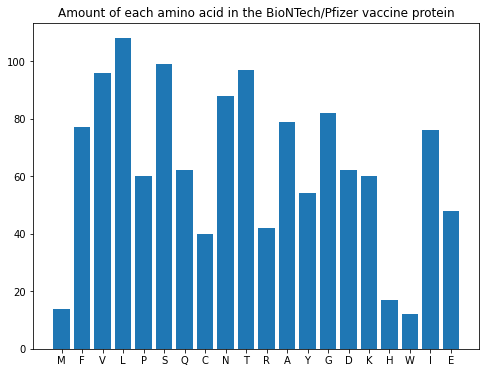

In [20]:
amino_counter = Counter(str(vaccines_data[company_names[0]]['Amino Seq']))

plt.figure(figsize=(8, 6))
plt.bar(amino_counter.keys(), amino_counter.values())
plt.title(f'Amount of each amino acid in the {company_names[0]} vaccine protein')

## 7

In [21]:
nucleotide_seq = str(vaccines_data[company_names[0]]['Nucleotide Seq'])

amino_nucleotide_counter = defaultdict(lambda: defaultdict(int))
for amino_idx, amino in enumerate(str(vaccines_data[company_names[0]]['Amino Seq'])):
    for codon_sub_idx in range(3):
        amino_nucleotide_counter[amino][nucleotide_seq[(amino_idx * 3) + codon_sub_idx]] += 1

amino_nucleotide_counter

defaultdict(<function __main__.<lambda>>,
            {'A': defaultdict(int, {'A': 4, 'C': 144, 'G': 79, 'U': 10}),
             'C': defaultdict(int, {'C': 27, 'G': 40, 'U': 53}),
             'D': defaultdict(int, {'A': 62, 'C': 44, 'G': 62, 'U': 18}),
             'E': defaultdict(int, {'A': 62, 'G': 82}),
             'F': defaultdict(int, {'C': 62, 'U': 169}),
             'G': defaultdict(int, {'A': 12, 'C': 66, 'G': 167, 'U': 1}),
             'H': defaultdict(int, {'A': 17, 'C': 32, 'U': 2}),
             'I': defaultdict(int, {'A': 76, 'C': 66, 'U': 86}),
             'K': defaultdict(int, {'A': 129, 'G': 51}),
             'L': defaultdict(int, {'C': 111, 'G': 105, 'U': 108}),
             'M': defaultdict(int, {'A': 14, 'G': 14, 'U': 14}),
             'N': defaultdict(int, {'A': 176, 'C': 67, 'U': 21}),
             'P': defaultdict(int, {'A': 4, 'C': 146, 'U': 30}),
             'Q': defaultdict(int, {'A': 66, 'C': 62, 'G': 58}),
             'R': defaultdict(int, {'A': 43

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(amino_nucleotide_counter)
df

,M,F,V,L,P,S,Q,C,N,T,R,A,Y,G,D,K,H,W,I,E
A,14.0,NaN,NaN,NaN,4.0,64,66.0,NaN,176.0,131.0,43.0,4,54.0,12,62,129.0,17.0,NaN,76.0,62.0
U,14.0,169.0,97.0,108.0,30.0,48,NaN,53.0,21.0,NaN,NaN,10,59.0,1,18,NaN,2.0,12.0,86.0,NaN
G,14.0,NaN,183.0,105.0,NaN,64,58.0,40.0,NaN,NaN,62.0,79,NaN,167,62,51.0,NaN,24.0,NaN,82.0
C,NaN,62.0,8.0,111.0,146.0,121,62.0,27.0,67.0,160.0,21.0,144,49.0,66,44,NaN,32.0,NaN,66.0,NaN


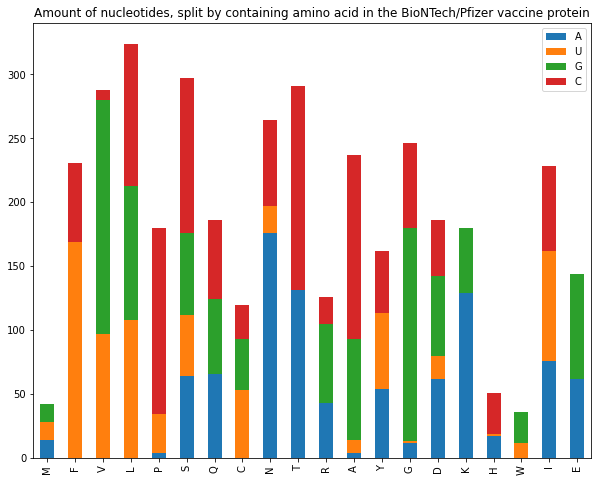

In [24]:
df.transpose().plot(kind="bar", stacked=True, figsize=(10, 8))
plt.title(f'Amount of nucleotides, split by containing amino acid in the {company_names[0]} vaccine protein');

---
##Comparison to the Wuhan strain:

## 8

In [25]:
print(f'The length of the Wuhan strain genome is {len(wuhan_sars_cov_2_sequence.seq)} nucleotides.')

The length of the Wuhan strain genome is 29903 nucleotides.


## 9

In [26]:
# From https://www.ncbi.nlm.nih.gov/gene/43740568
wuhan_sars_cov_2_data = get_translated_region(str(wuhan_sars_cov_2_sequence.seq[21563 - 1: 25384].transcribe()))

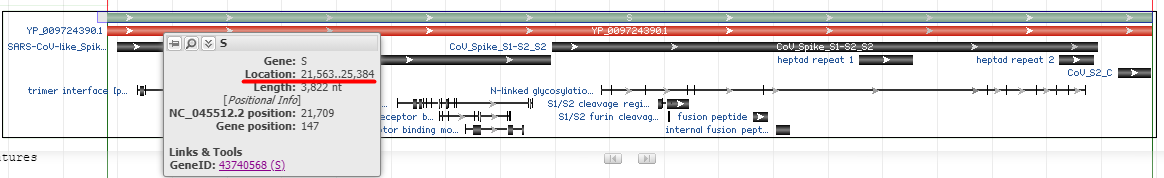

In [27]:
step = 102 # number of characters to print per row

for start_idx in range(0, len(wuhan_sars_cov_2_data['Nucleotide Seq']), step):
    print(wuhan_sars_cov_2_data['Nucleotide Seq'][start_idx:start_idx + step])

AUGUUUGUUUUUCUUGUUUUAUUGCCACUAGUCUCUAGUCAGUGUGUUAAUCUUACAACCAGAACUCAAUUACCCCCUGCAUACACUAAUUCUUUCACACGU
GGUGUUUAUUACCCUGACAAAGUUUUCAGAUCCUCAGUUUUACAUUCAACUCAGGACUUGUUCUUACCUUUCUUUUCCAAUGUUACUUGGUUCCAUGCUAUA
CAUGUCUCUGGGACCAAUGGUACUAAGAGGUUUGAUAACCCUGUCCUACCAUUUAAUGAUGGUGUUUAUUUUGCUUCCACUGAGAAGUCUAACAUAAUAAGA
GGCUGGAUUUUUGGUACUACUUUAGAUUCGAAGACCCAGUCCCUACUUAUUGUUAAUAACGCUACUAAUGUUGUUAUUAAAGUCUGUGAAUUUCAAUUUUGU
AAUGAUCCAUUUUUGGGUGUUUAUUACCACAAAAACAACAAAAGUUGGAUGGAAAGUGAGUUCAGAGUUUAUUCUAGUGCGAAUAAUUGCACUUUUGAAUAU
GUCUCUCAGCCUUUUCUUAUGGACCUUGAAGGAAAACAGGGUAAUUUCAAAAAUCUUAGGGAAUUUGUGUUUAAGAAUAUUGAUGGUUAUUUUAAAAUAUAU
UCUAAGCACACGCCUAUUAAUUUAGUGCGUGAUCUCCCUCAGGGUUUUUCGGCUUUAGAACCAUUGGUAGAUUUGCCAAUAGGUAUUAACAUCACUAGGUUU
CAAACUUUACUUGCUUUACAUAGAAGUUAUUUGACUCCUGGUGAUUCUUCUUCAGGUUGGACAGCUGGUGCUGCAGCUUAUUAUGUGGGUUAUCUUCAACCU
AGGACUUUUCUAUUAAAAUAUAAUGAAAAUGGAACCAUUACAGAUGCUGUAGACUGUGCACUUGACCCUCUCUCAGAAACAAAGUGUACGUUGAAAUCCUUC
ACUGUAGAAAAAGGAAUCUAUCAAACUUCUAACUUUAGAGUCCAACCAACAGAAUCUAUUGUUAGAUUUCCUA

## 10

In [28]:
from Bio.SeqUtils import GC

In [29]:
f'Wuhan virus variant spike protein GC content is: {GC(wuhan_sars_cov_2_sequence.seq):.2f}%.'

'Wuhan virus variant spike protein GC content is: 37.97%.'

In [30]:
f'{company_names[0]} vaccine (spike protein) GC content is: {GC(vaccines_data[company_names[0]]["Nucleotide Seq"]):.2f}%.'

'BioNTech/Pfizer vaccine (spike protein) GC content is: 56.99%.'

## 11

In [31]:
step = 68
for start_idx in range(0, len(wuhan_sars_cov_2_data['Amino Seq']), step):
    print(wuhan_sars_cov_2_data['Amino Seq'][start_idx:start_idx + step])

MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAI
HVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFC
NDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIY
SKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQP
RTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGE
VFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVR
QIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAG
STPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFN
GLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLY
QDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNS
PRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTE
CSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRS
FIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITS
GWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVV
NQNAQALNTLVKQLSSNFGAISSVLNDILSRLDK

## 12

In [32]:
step = 68
for start_idx in range(0, len(vaccines_data[company_names[0]]['Amino Seq']), step):
    vac_part = vaccines_data[company_names[0]]['Amino Seq'][start_idx:start_idx + step]
    vir_part = wuhan_sars_cov_2_data['Amino Seq'][start_idx:start_idx + step]

    print('Vac:', vac_part)
    print('Vir:', vir_part)
    print('    ', "".join([' ' if vac_part[i] == vir_part[i] else '^' for i in range(len(vac_part))]))

Vac: MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAI
Vir: MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAI
                                                                         
Vac: HVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFC
Vir: HVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFC
                                                                         
Vac: NDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIY
Vir: NDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIY
                                                                         
Vac: SKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQP
Vir: SKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQP
                                                                         
Vac: RTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGE
Vir: RTFLLKYNENGTITDAVDCALDPLSETKCTLKS

## 13

We buid a something that is a bit more than a LUT:
we count _how many times_ each codon in the vaccine was used instead of the corresponding codon in the virus.

In [33]:
vir_to_vac_codons_map = defaultdict(lambda: defaultdict(int))

for start_idx in range(0, len(vaccines_data[company_names[0]]['Amino Seq'])):
    vac_amino = vaccines_data[company_names[0]]['Amino Seq'][start_idx]
    vir_amino = wuhan_sars_cov_2_data['Amino Seq'][start_idx]
    
    if vac_amino == vir_amino:
        vac_codon = vaccines_data[company_names[0]]['Nucleotide Seq'][start_idx * 3:(start_idx + 1) * 3] 
        vir_codon = wuhan_sars_cov_2_data['Nucleotide Seq'][start_idx * 3:(start_idx + 1) * 3]

        vir_to_vac_codons_map[vir_codon][vac_codon] += 1

In [34]:
vir_to_vac_codons_map

defaultdict(<function __main__.<lambda>>,
            {'AAA': defaultdict(int, {'AAA': 6, 'AAG': 31}),
             'AAC': defaultdict(int, {'AAC': 26, 'AAU': 8}),
             'AAG': defaultdict(int, {'AAA': 3, 'AAG': 20}),
             'AAU': defaultdict(int, {'AAC': 41, 'AAU': 13}),
             'ACA': defaultdict(int, {'ACA': 13, 'ACC': 27}),
             'ACC': defaultdict(int, {'ACA': 1, 'ACC': 9}),
             'ACG': defaultdict(int, {'ACC': 3}),
             'ACU': defaultdict(int, {'ACA': 20, 'ACC': 24}),
             'AGA': defaultdict(int, {'AGA': 10, 'AGG': 1, 'CGG': 9}),
             'AGC': defaultdict(int, {'AGC': 3, 'UCC': 2}),
             'AGG': defaultdict(int, {'AGA': 3, 'CGC': 1, 'CGG': 6}),
             'AGU': defaultdict(int, {'AGC': 15, 'UCU': 2}),
             'AUA': defaultdict(int, {'AUC': 16, 'AUU': 2}),
             'AUC': defaultdict(int, {'AUC': 12, 'AUU': 2}),
             'AUG': defaultdict(int, {'AUG': 14}),
             'AUU': defaultdict(int, {'AUC':

## 14
It looks like most codons in the virus were replaced (in the vaccine) with compatible codons, but with more $G$ and $C$ nucleotides in them.

A few examples:
- 'AAA' was mapped to 'AAG' in more than 80% of the cases.
- 'AAU' was mapped to 'AAC' in more than 75% of the cases.
- 'AUU' was mapped to 'AUC' in more than 85% of the cases.
- 'CAA' was mapped to 'CAG' in more than 90% of the cases.
- 'UUG' was mapped to 'CAC' or 'CUG in 100% of the cases.

There are also cases that are less pronounced (e.g. 'ACU' to 'ACC' in only ~55%), and even cases where a mapping reduced the GC content (e.g. 'GGG' to 'GGA' in 66%), but both of these are the minority of cases (especially taking into account the codon counts).

This leads to an overall increase in GC content (as also seen above in question 10).

<br />

A higher GC content means the molecule would be more stable (if arranged in a double helix RNA) due to the stronger connection between $G$, $C$ nucleotides than between $A$, $U$ nucleotides. This might increase the chance of the molecule remaining intact during trasnport of the vaccine.

---
##The South-Afircan Variant (B.1.351):

##15

In [ ]:
wuhan_start_non_zero_based = 21563
seq_len = 20
wuhan_sars_cov_2_sequence.seq[wuhan_start_non_zero_based - 1: wuhan_start_non_zero_based + seq_len]


Seq('ATGTTTGTTTTTCTTGTTTTA')

In [ ]:
# The instructions as were given (verbatim):
# ------------------------------------------------------------------
# Namely, you know that 
#  (i) position 23011 in Wuhan strain is not “G” but “A” and 
#  (ii) position 23062 is not “A” but “T” 
#  (iii) and that position 21800 is not “A” but “C”. 

# Meaning:
# ------------------------------------------------------------------
# SA (aligned): 21800 - C, 23011 - A, 23062 - T
#
# Wuhan: 21800 - A, 23011 - G, 23062 - A 

In [ ]:
# However: 
print('(Wuhan: non-zero based)', wuhan_sars_cov_2_sequence[21800], wuhan_sars_cov_2_sequence[23011], wuhan_sars_cov_2_sequence[23062])
print('(Wuhan -1: zero based)', wuhan_sars_cov_2_sequence[21799], wuhan_sars_cov_2_sequence[23010], wuhan_sars_cov_2_sequence[23061])
print('(Wuhan +1: wrong?)', wuhan_sars_cov_2_sequence[21801], wuhan_sars_cov_2_sequence[23012], wuhan_sars_cov_2_sequence[23063])

(Wuhan: non-zero based) A G A
(Wuhan -1: zero based) G T T
(Wuhan +1: wrong?) T A A


In [ ]:
# We are looking for C, A, T nucleotides in poositions 21800, 23011, 23062 (non-zero based)
def is_seq_sa_variant(seq):
    if len(seq) < 23063:
        return False
    elif seq[21800] != 'C':
        return False
    elif seq[23011] != 'A':
        return False
    elif seq[23062] != 'T':
        return False
    else:
        return True

In [35]:
from google.colab import drive

GOOGLE_DRIVE_MOUNT_POINT = '/gdrive'
drive.mount(GOOGLE_DRIVE_MOUNT_POINT)

Mounted at /gdrive


In [36]:
# TODO: Change this to where the file is located your drive

COMPLETE_COVID_SEQUENCES_FILEPATH = f'{GOOGLE_DRIVE_MOUNT_POINT}/MyDrive/MSc/02 Genomics/HW1/sequences.fasta'

In [ ]:
complete_covid_sa_sequences = {}
for seq_data in SeqIO.parse(COMPLETE_COVID_SEQUENCES_FILEPATH, "fasta"):
    if is_seq_sa_variant(seq_data.seq):
        complete_covid_sa_sequences[seq_data.id] = seq_data

FileNotFoundError: ignored

In [ ]:
for seq_id in list(complete_covid_sa_sequences.keys())[:999]:
    print(complete_covid_sa_sequences[seq_id].description)

In [ ]:
complete_covid_sequences = SeqIO.parse(COMPLETE_COVID_SEQUENCES_FILEPATH, "fasta")

In [ ]:
i = 0
for seq in complete_covid_sequences:
    if i < 100:
        print(seq)
    
    i += 1

In [ ]:
for record in 

In [ ]:
sequences = "/gdrive/MyDrive/genom/sequences.fasta"

In [37]:
# sequences = COMPLETE_COVID_SEQUENCES_FILEPATH

per genome, check if indices below are A, T & C (print nucleotides around this are to be sure)

if yes, keep this genome's name and return all genomes matching these mutations

In [38]:
print(wuhan_sars_cov_2_sequence.seq[21800]) # while the Wuhan strain is "A" in this position, you should expect an "C" for SA variant
print(wuhan_sars_cov_2_sequence.seq[23011]) # while the Wuhan strain is "G" in this position, you should expect an "A" for SA variant
print(wuhan_sars_cov_2_sequence.seq[23062]) # while the Wuhan strain is "A" in this position, you should expect an "T" for SA variant

A
G
A


In [39]:
RANGE = 10

In [ ]:
X = wuhan_sars_cov_2_sequence.seq[21800-RANGE:21800] + "A" + wuhan_sars_cov_2_sequence.seq[21800+1:21800+RANGE] 
X == wuhan_sars_cov_2_sequence.seq[21800-RANGE:21800+RANGE]

True

In [42]:
wuhan_21800_a = wuhan_sars_cov_2_sequence.seq[21800-RANGE:21800]
wuhan_21800_b = wuhan_sars_cov_2_sequence.seq[21800+1:21800+RANGE]
sa_21800_sub = wuhan_21800_a + "C" + wuhan_21800_b

wuhan_23011_a = wuhan_sars_cov_2_sequence.seq[23011-RANGE:23011]
wuhan_23011_b = wuhan_sars_cov_2_sequence.seq[23011+1:23011+RANGE]
sa_23011_sub = wuhan_23011_a + "A" + wuhan_23011_b

wuhan_23062_a = wuhan_sars_cov_2_sequence.seq[23062-RANGE:23062]
wuhan_23062_b = wuhan_sars_cov_2_sequence.seq[23062+1:23062+RANGE]
sa_23062_sub = wuhan_23062_a + "T" + wuhan_23062_b

In [43]:
mutation_entries = []
known_mismatched_indices = [21800] # in increasing order
SEARCH_RANGE = 100
i = 0

FIRST_ENTRY=21800
SECOND_ENRTY=23011
THIRD_ENTRY=23062

good_ones = []
first_counter, second_counter, third_counter = 0,0,0
# one_percent = int(total_size/100)
for idx, entry in enumerate(SeqIO.parse(sequences, "fasta")):

      if idx < 100:
        print(entry.description.split('isolate')[1:][0].split(',')[0])
        continue
      break
        
     
      # if idx % one_percent == 0:
      if idx % 10000 == 0 and idx != 0:
          print(f"{int(idx/10000)}, found: {len(mutation_entries)}")
          break
      # wuhan_subsequence = wuhan_sars_cov_2_sequence.seq[index-RANGE:index+RANGE]
      entry_subsequence = entry.seq[FIRST_ENTRY - SEARCH_RANGE : FIRST_ENTRY + SEARCH_RANGE]
      substring_index = entry_subsequence.find(sa_21800_sub)
      if substring_index == -1:
          continue
      else:
          first_idx = substring_index
          first_counter += 1    

      entry_subsequence = entry.seq[SECOND_ENRTY - SEARCH_RANGE : SECOND_ENRTY + SEARCH_RANGE]
      substring_index = entry_subsequence.find(sa_23011_sub)
      if substring_index == -1:
          continue
      else:
          second_idx = substring_index
          second_counter += 1  

      entry_subsequence = entry.seq[THIRD_ENTRY - SEARCH_RANGE : THIRD_ENTRY + SEARCH_RANGE]
      substring_index = entry_subsequence.find(sa_23062_sub)
      if substring_index == -1:
          continue
      else:
          third_idx = substring_index
          third_counter += 1 

      good_ones.append((entry.id, entry.seq))
      mutation_entries.append((entry.id, first_idx, second_idx, third_idx))
      
first_counter, second_counter, third_counter

 Wuhan-Hu-1
 SARS-CoV-2/human/USA/CA-CDC-STM-000039909/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039941/2021
 SARS-CoV-2/human/USA/CA-CDC-STM-000039910/2021
 SARS-CoV-2/human/USA/NC-CDC-STM-000039942/2021
 SARS-CoV-2/human/USA/GA-CDC-STM-000039974/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039903/2021
 SARS-CoV-2/human/USA/CA-CDC-STM-000039919/2021
 SARS-CoV-2/human/USA/NC-CDC-STM-000039943/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039959/2021
 SARS-CoV-2/human/USA/GA-CDC-STM-000039975/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039904/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039960/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039968/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039913/2021
 SARS-CoV-2/human/USA/CA-CDC-STM-000039906/2021
 SARS-CoV-2/human/USA/CA-CDC-STM-000039922/2021
 SARS-CoV-2/human/USA/IN-CDC-STM-000039954/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039907/2021
 SARS-CoV-2/human/USA/PA-CDC-STM-000039971/2021
 SARS-CoV-2/human/USA/FL-CDC-STM-000039908/2021
 SARS-CoV-2/human/USA/FL-CDC

(0, 0, 0)

In [45]:
for entry_id, entry_seq in good_ones:
  print(entry_id)
  print("idx_21800:", entry_seq.find(sa_21800_sub), 21800-entry_seq.find(sa_21800_sub), "idx_23011:", entry_seq.find(sa_23011_sub), 23011-entry_seq.find(sa_23011_sub), "idx_23062:", entry_seq.find(sa_23062_sub), 23062-entry_seq.find(sa_23062_sub))

In [ ]:
# in range of 100 we found 64

^ the second genome aligns with the wuhan one after 45 chars


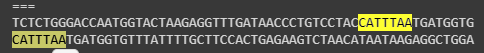

In [ ]:
print(f'wuhan: {wuhan_sars_cov_2_sequence.seq[21800-RANGE:21800]} {wuhan_sars_cov_2_sequence.seq[21800:21801]} {wuhan_sars_cov_2_sequence.seq[21801:21800+RANGE]}')
print(f'entry: {entry.seq[21800-RANGE:21800]} {entry.seq[21800:21801]} {entry.seq[21801:21800+RANGE]}')

res = [entry_subsequence[i: j] for i in range(len(entry_subsequence)) for j in range(i + 1, len(entry_subsequence) + 1) if len(entry_subsequence[i:j]) == RANGE]

for a in res:
    print(a)
    alignments = pairwise2.align.globalms(wuhan_subsequence, a, 1, -1, -1, -1)
    print(format_alignment(*alignments[0]))
    # print(alignments)